In [23]:
#Load dataset
import pandas as pd

df = pd.read_csv("./IMDB-Dataset.csv")

# Count duplicated samples
num_duplicates = df.duplicated().sum()

print(f"Total duplicated samples: {num_duplicates}")

#Remove duplicate rows
df = df.drop_duplicates()

Total duplicated samples: 418


In [6]:
pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/4


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install contractions

   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/289.9 kB 1.7 MB/s eta 0:00:01
   ----------------------------------- ---- 256.0/289.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 289.9/289.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))

#Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

#Function to clean data
def preprocess_text(text):
    wl = WordNetLemmatizer()

    soup = BeautifulSoup(text, 'html.parser') #Removing html tags

    text = soup.get_text()
    text = expand_contractions(text) #Expanding chatwords and contracts clearing contractions

    emoji_clean = re.compile("["                             
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\u2600-\u26FF"          # miscellaneous symbols
                             u"\u2700-\u27BF"          # dingbats
                             "]+", flags=re.UNICODE)
    
    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\S)', '. ', text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ]) #remove punctuation and make text lowercase
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()
    ]) #lemmatize

    return text

df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20340\1755416907.py:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser') #Removing html tags


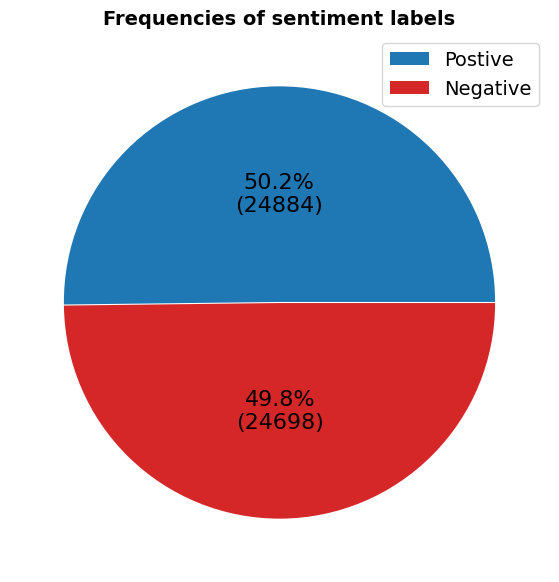

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']

#Create pie chart
pie, ax = plt.subplots(figsize=[11,7])
plt.pie(
    x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize': 16})
plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')
labels = [r'Postive', r'Negative']
plt.legend(labels, loc="best", prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()


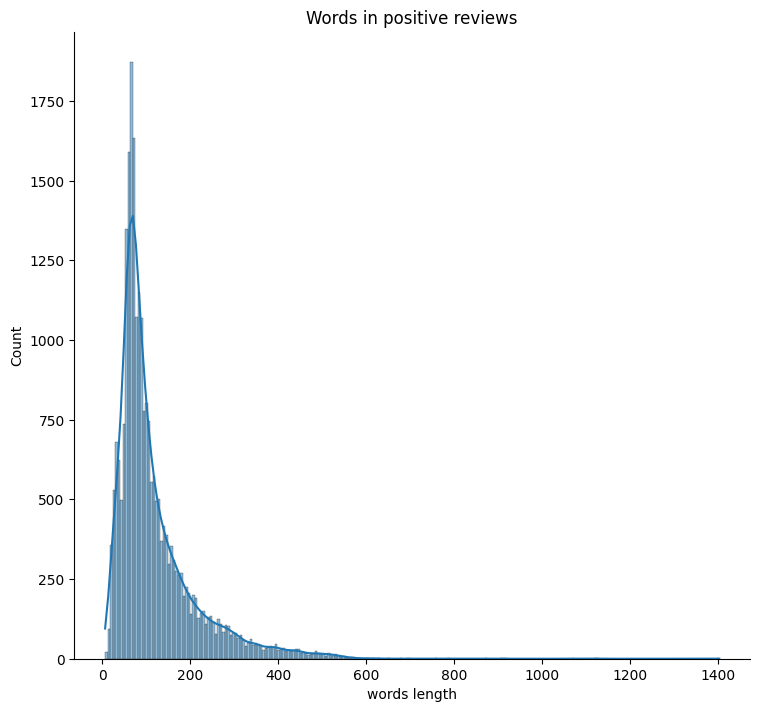

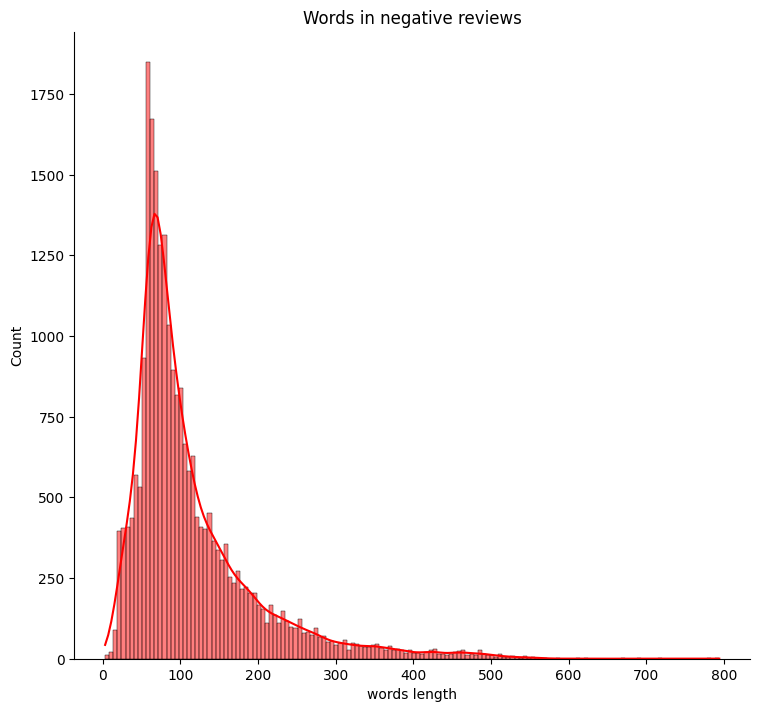

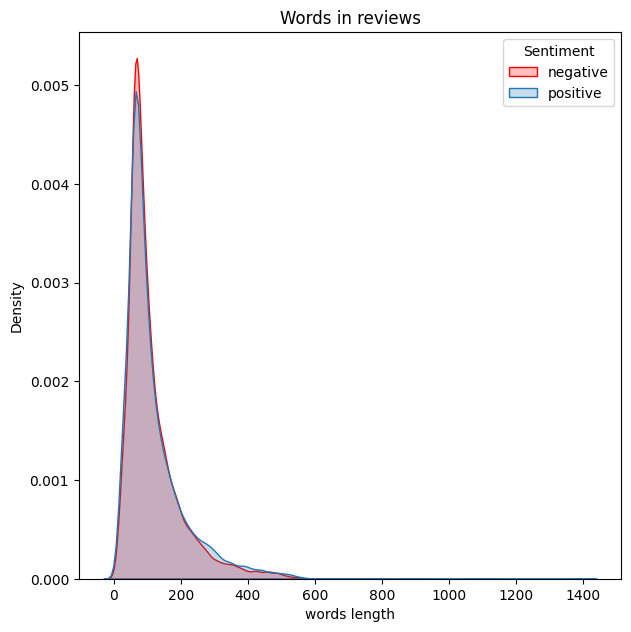

In [16]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x='words length', hue='sentiment', kde=True, height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x='words length', hue='sentiment', kde=True, height=7, aspect=1.1, legend=False, palette=['red']
).set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7,7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp, x='words length', hue='sentiment', fill=True, palette=[sns.color_palette()[0],'red']
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distribution_number_words_plot)

In [19]:
#Split train and test set
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

x_train, x_test, y_train, y_test = train_test_split(
    df['review'], y_data, test_size=0.2, random_state=42
)

In [25]:
tdidf_vectorizer = TfidfVectorizer(max_features=10000)
tdidf_vectorizer.fit(x_train, y_train)

vocab_size = len(tdidf_vectorizer.get_feature_names_out())
print(f"Kích thước bộ từ điển: {vocab_size}")

x_train_encoded = tdidf_vectorizer.transform(x_train)
x_test_encoded = tdidf_vectorizer.transform(x_test)

Kích thước bộ từ điển: 10000


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)
dt_y_pred = dt_classifier.predict(x_test_encoded)
print("The accuracy of Decision Tree model:", accuracy_score(dt_y_pred, y_test))

rf_classifier = RandomForestClassifier(
    random_state=42
)
rf_classifier.fit(x_train_encoded, y_train)
rf_y_pred = rf_classifier.predict(x_test_encoded)
print("The accuracy of Random Forest model:", accuracy_score(rf_y_pred, y_test))

The accuracy of Decision Tree model: 0.7111021478269638
The accuracy of Random Forest model: 0.8406776242815368
